Folder 'html' already exists.
Folder 'html_financial' already exists.
Connection to MySQL DB successful
Target Value : 6-3-7C7765CA42755D907CEDFD0555B6B101
JSESSIONID: web10102~7v0QBk9pOCji-uAxlfR8zTmq.f2289fb8-736e-3e71-ad99-21013399396d
SERVERID: ha101


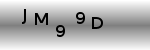

Target SEARCH HDIV Value : 6-0-7C7765CA42755D907CEDFD0555B6B101
https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/searchEstablishment?_HDIV_STATE_=6-0-7C7765CA42755D907CEDFD0555B6B101
Solved: JM99D
{"EstName": "SURESH PRODUCTIONS ENTERTAINMENT LLP", "EstCode": "", "captcha": "JM99D"}
{'Cookie': 'JSESSIONID=web10102~7v0QBk9pOCji-uAxlfR8zTmq.f2289fb8-736e-3e71-ad99-21013399396d; SERVERID=ha101;', 'Content-Type': 'application/json'}
keyword  MRNOI1979282000
getDetails_3 Value : 8-0-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_4 Value : 8-1-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_5 Value : 8-2-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_6 Value : 8-3-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_7 Value : 8-4-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_8 Value : 8-5-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_9 Value : 8-6-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_10 Value : 8-7-E8148A7C2F26D44BDE0ACFC02C027304
getDetails_11 Value : 8-8-E8148A7C2F26D44BDE0ACFC02C

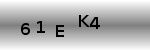

Target SEARCH HDIV Value : 20-0-C5963FE8B0D353C5C8E6B1B0A3CAE019
https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/searchEstablishment?_HDIV_STATE_=20-0-C5963FE8B0D353C5C8E6B1B0A3CAE019
Solved: 61EK4
{"EstName": "SURESH PRODUCTIONS ENTERTAINMENT LLP", "EstCode": "", "captcha": "61EK4"}
{'Cookie': 'JSESSIONID=web10202~bOc+6x9A261dlGMOxir0eDFk.85a8e7c6-7331-3753-aff6-8933005c7f5b; SERVERID=ha102;', 'Content-Type': 'application/json'}
keyword  PBBTI1995034000
getDetails_3 Value : 22-0-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_4 Value : 22-1-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_5 Value : 22-2-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_6 Value : 22-3-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_7 Value : 22-4-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_8 Value : 22-5-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_9 Value : 22-6-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_10 Value : 22-7-CBFD50497B6DCAA237106DFC7754F4E6
getDetails_11 Value : 22-8-CBFD50497B6DCAA

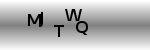

Target SEARCH HDIV Value : 11-0-15559DFC5283DF194124CFC9B187F810
https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/searchEstablishment?_HDIV_STATE_=11-0-15559DFC5283DF194124CFC9B187F810
Solved: MTWQ
{"EstName": "SURESH PRODUCTIONS ENTERTAINMENT LLP", "EstCode": "", "captcha": "MTWQ"}
{'Cookie': 'JSESSIONID=web10101~Pqy9bShJhX4nCveqP32z74-V.2630cd14-e63d-3bc7-b90c-e393b308a14e; SERVERID=ha101;', 'Content-Type': 'application/json'}


KeyboardInterrupt: 

In [10]:
import requests
import json
from IPython.display import display, Image
import re
import mysql.connector
from mysql.connector import Error
from lxml import html
import time
import shutil
from datetime import datetime
from lxml import html
from mltu.configs import BaseModelConfigs
from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder
import cv2
import numpy as np
import typing
import os
import random
import string

def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")

create_folder('html')
create_folder('html_financial')

while True:
    try:
        conf = open("xsinepfo.json") 
        conFile = json.load(conf)  

        class ImageToWordModel(OnnxInferenceModel):
            def __init__(self, char_list: typing.Union[str, list], *args, **kwargs):
                super().__init__(*args, **kwargs)
                self.char_list = char_list

            def predict(self, image: np.ndarray):
                image = cv2.resize(image, self.input_shape[:2][::-1])
                image_pred = np.expand_dims(image, axis=0).astype(np.float32)
                preds = self.model.run(None, {self.input_name: image_pred})[0]
                text = ctc_decoder(preds, self.char_list)[0]
                return text


        def get_latest_fin(response_13):
            payment_list = []
            tree = html.fromstring(response_13.text)
            tr_elements = tree.xpath('//tr')
            for tr_element in tr_elements:
                td_elements = tr_element.xpath('.//td[@style="text-align: left;"]/text()')
                # Extracted information
                TRRN = td_elements[0].strip() if td_elements else ""
                Date_Of_Credit = td_elements[1].strip() if len(td_elements) > 1 else ""
                Amount = td_elements[2].strip() if len(td_elements) > 2 else ""
                Wage_Month = td_elements[3].strip() if len(td_elements) > 3 else ""
                No_of_Employee = td_elements[4].strip() if len(td_elements) > 4 else ""
                ECR = td_elements[5].strip() if len(td_elements) > 5 else ""
                if not No_of_Employee:
                    No_of_Employee_element = tr_element.xpath('.//td[@style="text-align: left;"]/a/text()')
                    No_of_Employee = No_of_Employee_element[0].strip() if No_of_Employee_element else ""
                if not ECR:
                    ECR = tr_element.xpath('.//td[last()]/text()')[0].strip() if tr_element.xpath('.//td[last()]/text()') else ""
                payment_list.append((f"{TRRN}", f"{Date_Of_Credit}", f"{Amount}", f"{Wage_Month}", f"{No_of_Employee}", f"{ECR}"))
            
            print(payment_list)

            data_with_datetime = [
                (a, datetime.strptime(b, '%d-%b-%Y %H:%M:%S'), c, d, e, f)
                for a, b, c, d, e, f in payment_list[1:]
            ]

            # Find the tuple with the latest datetime
            latest_tuple = max(data_with_datetime, key=lambda x: x[1])
            code, dt_object, value, month, other_value, flag = latest_tuple
            formatted_dt = dt_object.strftime('%d-%b-%Y %H:%M:%S')
            modified_tuple = (code, formatted_dt, value, month, other_value, flag)

            financial_html = f"""
                <!DOCTYPE html>
                <html lang="en">
                <head>
                    <meta charset="UTF-8">
                    <meta http-equiv="X-UA-Compatible" content="IE=edge">
                    <meta name="viewport" content="width=device-width, initial-scale=1.0">
                    <title>Document</title>
                </head>
                <body>
                    <br>
                    <strong>PAYMENT DETAILS</strong>
                    <div id="trrn"><strong>trrn :</strong> {modified_tuple[0]}</div>
                    <div id="dateOfCredit"><strong>dateOfCredit :</strong> {modified_tuple[1]}</div>
                    <div id="amount"><strong>amount :</strong> {modified_tuple[2]}</div>
                    <div id="wageMonth"><strong>wageMonth :</strong> {modified_tuple[3]}</div>
                    <div id="noOfEmployee"><strong>noOfEmployee :</strong> {modified_tuple[4]}</div>
                    <div id="ecr"><strong>ecr :</strong> {modified_tuple[5]}</div>

                </body>
                </html>
            """


            return financial_html

        class DbService:
            connection = None
            connection_mappings = None

            def __init__(self):         
                try:
                    self.connection = mysql.connector.connect(
                        host='localhost',
                        user='root',
                        passwd='',
                        database='crawler_db',
                        port='3306'
                    )

                    print("Connection to MySQL DB successful")
                except Error as e:
                    print(f"The error '{e}' occurred")

            def close(self):
                # self.connection_mappings.close()
                self.connection.close()

            def get_a_record(self, max_retries=3, retry_delay=1):
                    cursor = self.connection.cursor()
                    try:
                        cursor.execute('CALL `PROCEDURE_URL_XSINEPFO_V2`(@p0)')
                        cursor.execute("SELECT @p0 AS `keyword`;")
                        results = cursor.fetchall()
                        # Update the status to 9 for the selected rows
                        if results:
                            keyword = results[0][0]
                            # keyword = 'PUSLP1994477000' #'PUPUN1992630000' #'APHYD0044147000'
                            print('keyword', keyword)
                            # Commit the changes
                            self.connection.commit()
                            return str(keyword).strip()
                    except mysql.connector.Error as e:
                        print(f"An error occurred while executing the database query: {e}")
                        cursor.close()
                        if max_retries > 0:
                            print("Retrying in a moment...")
                            time.sleep(retry_delay)
                            return self.get_a_record(max_retries=max_retries-1, retry_delay=retry_delay)
                        else:
                            print("Maximum retries reached. Returning None.")
                            return None

            def update_the_record_10(self, keyword, max_retries=3, retry_delay=1):
                    cursor = None
                    try:
                        cursor = self.connection.cursor(prepared=True)
                        query = f"UPDATE `TEMP_URL_XSINEPFO_V2` SET `status` = 10 WHERE `establishment_code` = '{keyword}'"
                        print(query)
                        cursor.execute(query)
                        self.connection.commit()
                        cursor.close()
                        return False
                    except mysql.connector.Error as e:
                        print(f"An error occurred while updating the record: {e}")
                        if cursor is not None:
                            cursor.close()
                        if max_retries > 0:
                            print("Retrying in a moment...")
                            time.sleep(retry_delay)
                            return self.update_the_record_10(keyword, max_retries=max_retries-1, retry_delay=retry_delay)
                        else:
                            print("Maximum retries reached. Returning False.")
                            return False

        database_service = DbService()      

        def get_session():
            try:
                s.close()
            except:pass
            
            s = requests.Session()
            response_home = s.get('https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/misReport/home/loadEstSearchHome')
            html_code = str(response_home.text)
            pattern_createCaptcha = r"/publicPortal/no-auth/captcha/createCaptcha\?_HDIV_STATE_=([^\'\s]+)"
            match_url = re.search(pattern_createCaptcha, html_code)

            if match_url:
                createCaptcha = match_url.group(1)
                createCaptcha_value = createCaptcha.rstrip('"')
                print("Target Value :", createCaptcha_value)
            else:
                print("Target value from URL not found.")
                
            headers_home = response_home.headers
            # Parse the Set-Cookie header to get JSESSIONID and SERVERID
            set_cookie_header = headers_home.get('Set-Cookie', '')
            cookie_parts = [part.strip() for part in set_cookie_header.split(',')]
            # Extract JSESSIONID and SERVERID
            jsessionid = None
            serverid = None
            for part in cookie_parts:
                if part.startswith('JSESSIONID='):
                    jsessionid = part.split('=')[1].split(';')[0]
                elif part.startswith('SERVERID='):
                    serverid = part.split('=')[1].split(';')[0]

            # Print the results
            print("JSESSIONID:", jsessionid)
            print("SERVERID:", serverid)

            url = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/captcha/createCaptcha?_HDIV_STATE_={createCaptcha_value}"

            payload = f"_HDIV_STATE_={createCaptcha_value}"
            headers = {
            'Cookie': f'JSESSIONID={jsessionid}; SERVERID={serverid}',
            'Content-Type': 'application/json'
            }

            response = s.get(url, headers=headers, data=payload)
            display(Image(response.content))
            captcha_name = random.choice(string.ascii_uppercase)
            with open(f'{captcha_name}.png', 'wb') as f:
                f.write(response.content)

            pattern_searchEstablishment = r"/publicPortal/no-auth/estSearch/searchEstablishment\?_HDIV_STATE_=([^\'\s]+)"
            match_searchEstablishment = re.search(pattern_searchEstablishment, html_code)

            if match_searchEstablishment:
                searchEstablishment = match_searchEstablishment.group(1)
                searchEstablishment_value = searchEstablishment.rstrip('"')
                print("Target SEARCH HDIV Value :", searchEstablishment_value)
            else:
                print("Target value from URL not found.")

            search_url = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/searchEstablishment?_HDIV_STATE_={searchEstablishment_value}"
            print(search_url)
            count = 0
            while count <= 3:
                try:
                    image = cv2.imread(f'{captcha_name}.png')
                    model = ImageToWordModel(model_path="model.onnx", char_list="LRFACOW_QUYE3\u20756JDZSN8I+2V1TK4PMB07X59\xCDGH")
                    captcha_text = model.predict(image)
                    # captcha_text = 'MAGIC'
                    print('Solved: ' + str(captcha_text))
                    os.remove(f'{captcha_name}.png')
                    break
                except Exception as e:
                    print(e)
                    count += 1
                    continue

            # current_path = 'captcha_c.png'
            # destination_folder = 'Captcha/'
            # new_filename = f'{str(captcha_text)}.png'

            # destination_path = os.path.join(destination_folder, new_filename)
            # shutil.move(current_path, destination_path)

            search_payload = json.dumps({
            "EstName": 'SURESH PRODUCTIONS ENTERTAINMENT LLP',
            "EstCode": "",
            "captcha": str(captcha_text)
            })

            print(search_payload)
            search_headers = {
            'Cookie': f'JSESSIONID={jsessionid}; SERVERID={serverid};',
            'Content-Type': 'application/json'
            }
            print(search_headers)
            response_search = s.post(search_url, headers=search_headers, data=search_payload)
            # display(HTML(response_search.text))
            if "Please enter valid captcha and valid Establishment name or code number" in response_search.text :
                get_session()
            else:
                return s, jsessionid, serverid, response_search

        s, jsessionid, serverid, response_search = get_session()
        while True:
            keyword = database_service.get_a_record()
            search_code = str(response_search.text)
            pattern_getDetails_3 = r"/publicPortal/no-auth/estSearch/getDetails_3\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_3 = re.search(pattern_getDetails_3, search_code)

            if match_getDetails_3:
                getDetails_3 = match_getDetails_3.group(1)
                getDetails_3_value = getDetails_3.rstrip('"')
                print("getDetails_3 Value :", getDetails_3_value)
            else:
                print("getDetails_3 value from URL not found.")

            pattern_getDetails_4 = r"/publicPortal/no-auth/estSearch/getDetails_4\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_4 = re.search(pattern_getDetails_4, search_code)

            if match_getDetails_4:
                getDetails_4 = match_getDetails_4.group(1)
                getDetails_4_value = getDetails_4.rstrip('"')
                print("getDetails_4 Value :", getDetails_4_value)
            else:
                print("getDetails_4 value from URL not found.")

            pattern_getDetails_5 = r"/publicPortal/no-auth/estSearch/getDetails_5\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_5 = re.search(pattern_getDetails_5, search_code)

            if match_getDetails_5:
                getDetails_5 = match_getDetails_5.group(1)
                getDetails_5_value = getDetails_5.rstrip('"')
                print("getDetails_5 Value :", getDetails_5_value)
            else:
                print("getDetails_5 value from URL not found.")

            pattern_getDetails_6 = r"/publicPortal/no-auth/estSearch/getDetails_6\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_6 = re.search(pattern_getDetails_6, search_code)

            if match_getDetails_6:
                getDetails_6 = match_getDetails_6.group(1)
                getDetails_6_value = getDetails_6.rstrip('"')
                print("getDetails_6 Value :", getDetails_6_value)
            else:
                print("getDetails_6 value from URL not found.")

            pattern_getDetails_7 = r"/publicPortal/no-auth/estSearch/getDetails_7\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_7 = re.search(pattern_getDetails_7, search_code)

            if match_getDetails_7:
                getDetails_7 = match_getDetails_7.group(1)
                getDetails_7_value = getDetails_7.rstrip('"')
                print("getDetails_7 Value :", getDetails_7_value)
            else:
                print("getDetails_7 value from URL not found.")

            pattern_getDetails_8 = r"/publicPortal/no-auth/estSearch/getDetails_8\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_8 = re.search(pattern_getDetails_8, search_code)

            if match_getDetails_8:
                getDetails_8 = match_getDetails_8.group(1)
                getDetails_8_value = getDetails_8.rstrip('"')
                print("getDetails_8 Value :", getDetails_8_value)
            else:
                print("getDetails_8 value from URL not found.")

            pattern_getDetails_9 = r"/publicPortal/no-auth/estSearch/getDetails_9\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_9 = re.search(pattern_getDetails_9, search_code)

            if match_getDetails_9:
                getDetails_9 = match_getDetails_9.group(1)
                getDetails_9_value = getDetails_9.rstrip('"')
                print("getDetails_9 Value :", getDetails_9_value)
            else:
                print("getDetails_9 value from URL not found.")

            pattern_getDetails_10 = r"/publicPortal/no-auth/estSearch/getDetails_10\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_10 = re.search(pattern_getDetails_10, search_code)

            if match_getDetails_10:
                getDetails_10 = match_getDetails_10.group(1)
                getDetails_10_value = getDetails_10.rstrip('"')
                print("getDetails_10 Value :", getDetails_10_value)
            else:
                print("getDetails_10 value from URL not found.")

            pattern_getDetails_11 = r"/publicPortal/no-auth/estSearch/getDetails_11\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_11 = re.search(pattern_getDetails_11, search_code)

            if match_getDetails_11:
                getDetails_11 = match_getDetails_11.group(1)
                getDetails_11_value = getDetails_11.rstrip('"')
                print("getDetails_11 Value :", getDetails_11_value)
            else:
                print("getDetails_11 value from URL not found.")

            pattern_getDetails_12 = r"/publicPortal/no-auth/estSearch/getDetails_12\?_HDIV_STATE_=([^\'\s]+)"
            match_getDetails_12 = re.search(pattern_getDetails_12, search_code)

            if match_getDetails_12:
                getDetails_12 = match_getDetails_12.group(1)
                getDetails_12_value = getDetails_12.rstrip('"')
                print("getDetails_12 Value :", getDetails_12_value)
            else:
                print("getDetails_12 value from URL not found.")


            url_3 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_3?_HDIV_STATE_={getDetails_3_value}"
            url_4 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_4?_HDIV_STATE_={getDetails_4_value}"
            url_5 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_5?_HDIV_STATE_={getDetails_5_value}"
            url_6 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_6?_HDIV_STATE_={getDetails_6_value}"
            url_7 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_7?_HDIV_STATE_={getDetails_7_value}"
            url_8 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_8?_HDIV_STATE_={getDetails_8_value}"
            url_9 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_9?_HDIV_STATE_={getDetails_9_value}"
            url_10 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_10?_HDIV_STATE_={getDetails_10_value}"
            url_11 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_11?_HDIV_STATE_={getDetails_11_value}"
            url_12 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/getDetails_12?_HDIV_STATE_={getDetails_12_value}"


            payload__search = json.dumps({
            "EstId": keyword
            })

            headers__search = {
            'Cookie': f'JSESSIONID={jsessionid}; SERVERID={serverid}',
            'Content-Type': 'application/json'
            }

            response_4 = s.post(url_4, headers=headers__search, data=payload__search)
            response_5 = s.post(url_5, headers=headers__search, data=payload__search)
            response_6 = s.post(url_6, headers=headers__search, data=payload__search)
            response_7 = s.post(url_7, headers=headers__search, data=payload__search)
            response_8 = s.post(url_8, headers=headers__search, data=payload__search)
            response_9 = s.post(url_9, headers=headers__search, data=payload__search)
            response_10 =s.post(url_10, headers=headers__search, data=payload__search)
            response_11 = s.post(url_11, headers=headers__search, data=payload__search)
            response_12 = s.post(url_12, headers=headers__search, data=payload__search)
            response_3 = s.post(url_3, headers=headers__search, data=payload__search)

            html_3 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Validity Status (As per Online Coverage)</strong> (View Payment Details)</p>

            </body>
            </html>
            """

            html_4 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Establishment Status (As per EPFO Master)</strong></p>

            </body>
            </html>
            """

            html_5 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Establishment Details (As per Form 5A submitted Online by the Employer)</strong></p>

            </body>
            </html>
            """

            html_6 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Factory Details</strong></p>

            </body>
            </html>
            """

            html_7 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Owner Details</strong></p>

            </body>
            </html>
            """

            html_8 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong> Units / SubCode Under same Jurisdiction</strong></p>

            </body>
            </html>
            """

            html_9 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Other Code Numbers with same Establishment</strong></p>

            </body>
            </html>
            """

            html_10 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong> Branches Without Code</strong></p>

            </body>
            </html>
            """

            html_11 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Establishment/s with Same PAN</p>

            </body>
            </html>
            """

            html_12 = """
            <!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta http-equiv="X-UA-Compatible" content="IE=edge">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Validity Status</title>
            </head>
            <body>
                <br>
                <p><strong>Additional Information</strong></p>

            </body>
            </html>
            """

            payment_code = str(response_3.text)
            pattern_payment = fr"/publicPortal/no-auth/estSearch/viewPaymentDetails/{keyword}\?_HDIV_STATE_=([^\'\s]+)"
            match_payment = re.search(pattern_payment, payment_code)

            if match_payment:
                payment = match_payment.group(1)
                payment_value = payment.rstrip('"')
                print("payment Value :", payment_value)
                url_13 = f"https://unifiedportal-epfo.epfindia.gov.in/publicPortal/no-auth/estSearch/viewPaymentDetails/{keyword}?_HDIV_STATE_={payment_value}"
                print(url_13)
                response_13 = s.post(url_13, headers=headers__search, data=payload__search)
                if 'No Payment details found for this Establishment.' not in response_13.text:
                    # fin_html = get_latest_fin(response_13)
                    response_final = html_3+response_3.text +html_4+ response_4.text +html_5+ response_5.text +html_6+ response_6.text +html_7+ response_7.text +html_8+ response_8.text +html_9+  response_9.text +html_10+  response_10.text +html_11+  response_11.text +html_12+ response_12.text +response_13.text
                    with open(f'html_financial/{keyword}.html', 'w', encoding='utf-8') as file:
                        file.write(response_final)
                        print(f'{keyword} saved in html_financial')
                    database_service.update_the_record_10(keyword)
                    s, jsessionid, serverid, response_search = get_session()
                else:
                    response_final = html_3+response_3.text +html_4+ response_4.text +html_5+ response_5.text +html_6+ response_6.text +html_7+ response_7.text +html_8+ response_8.text +html_9+  response_9.text +html_10+  response_10.text +html_11+  response_11.text +html_12+ response_12.text +response_13.text
                    with open(f'html/{keyword}.html', 'w', encoding='utf-8') as file:
                        file.write(response_final)
                    database_service.update_the_record_10(keyword)
                    print(f'{keyword} saved in html')

            else:
                print("payment value from URL not found.")
                s,jsessionid, serverid, response_search = get_session()

    except Exception as e:
        print(e)
        pass 



